In [10]:
import pandas
from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib','inline')
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [21]:
pandas.read_csv('iris.csv')

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [26]:
iris=pandas.read_csv('iris.csv')

In [27]:
X = iris.drop('species', axis=1)
y = iris['species']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [29]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
y_pred = classifier.predict(X_test)

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 7  0  0]
 [ 0 13  0]
 [ 0  1  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.98      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [34]:
df=pandas.DataFrame({'actual':y_test, 'predicted':y_pred})
df

,actual,predicted
149,Iris-virginica,Iris-virginica
2,Iris-setosa,Iris-setosa
90,Iris-versicolor,Iris-versicolor
106,Iris-virginica,Iris-versicolor
87,Iris-versicolor,Iris-versicolor
86,Iris-versicolor,Iris-versicolor
36,Iris-setosa,Iris-setosa
65,Iris-versicolor,Iris-versicolor
128,Iris-virginica,Iris-virginica
68,Iris-versicolor,Iris-versicolor


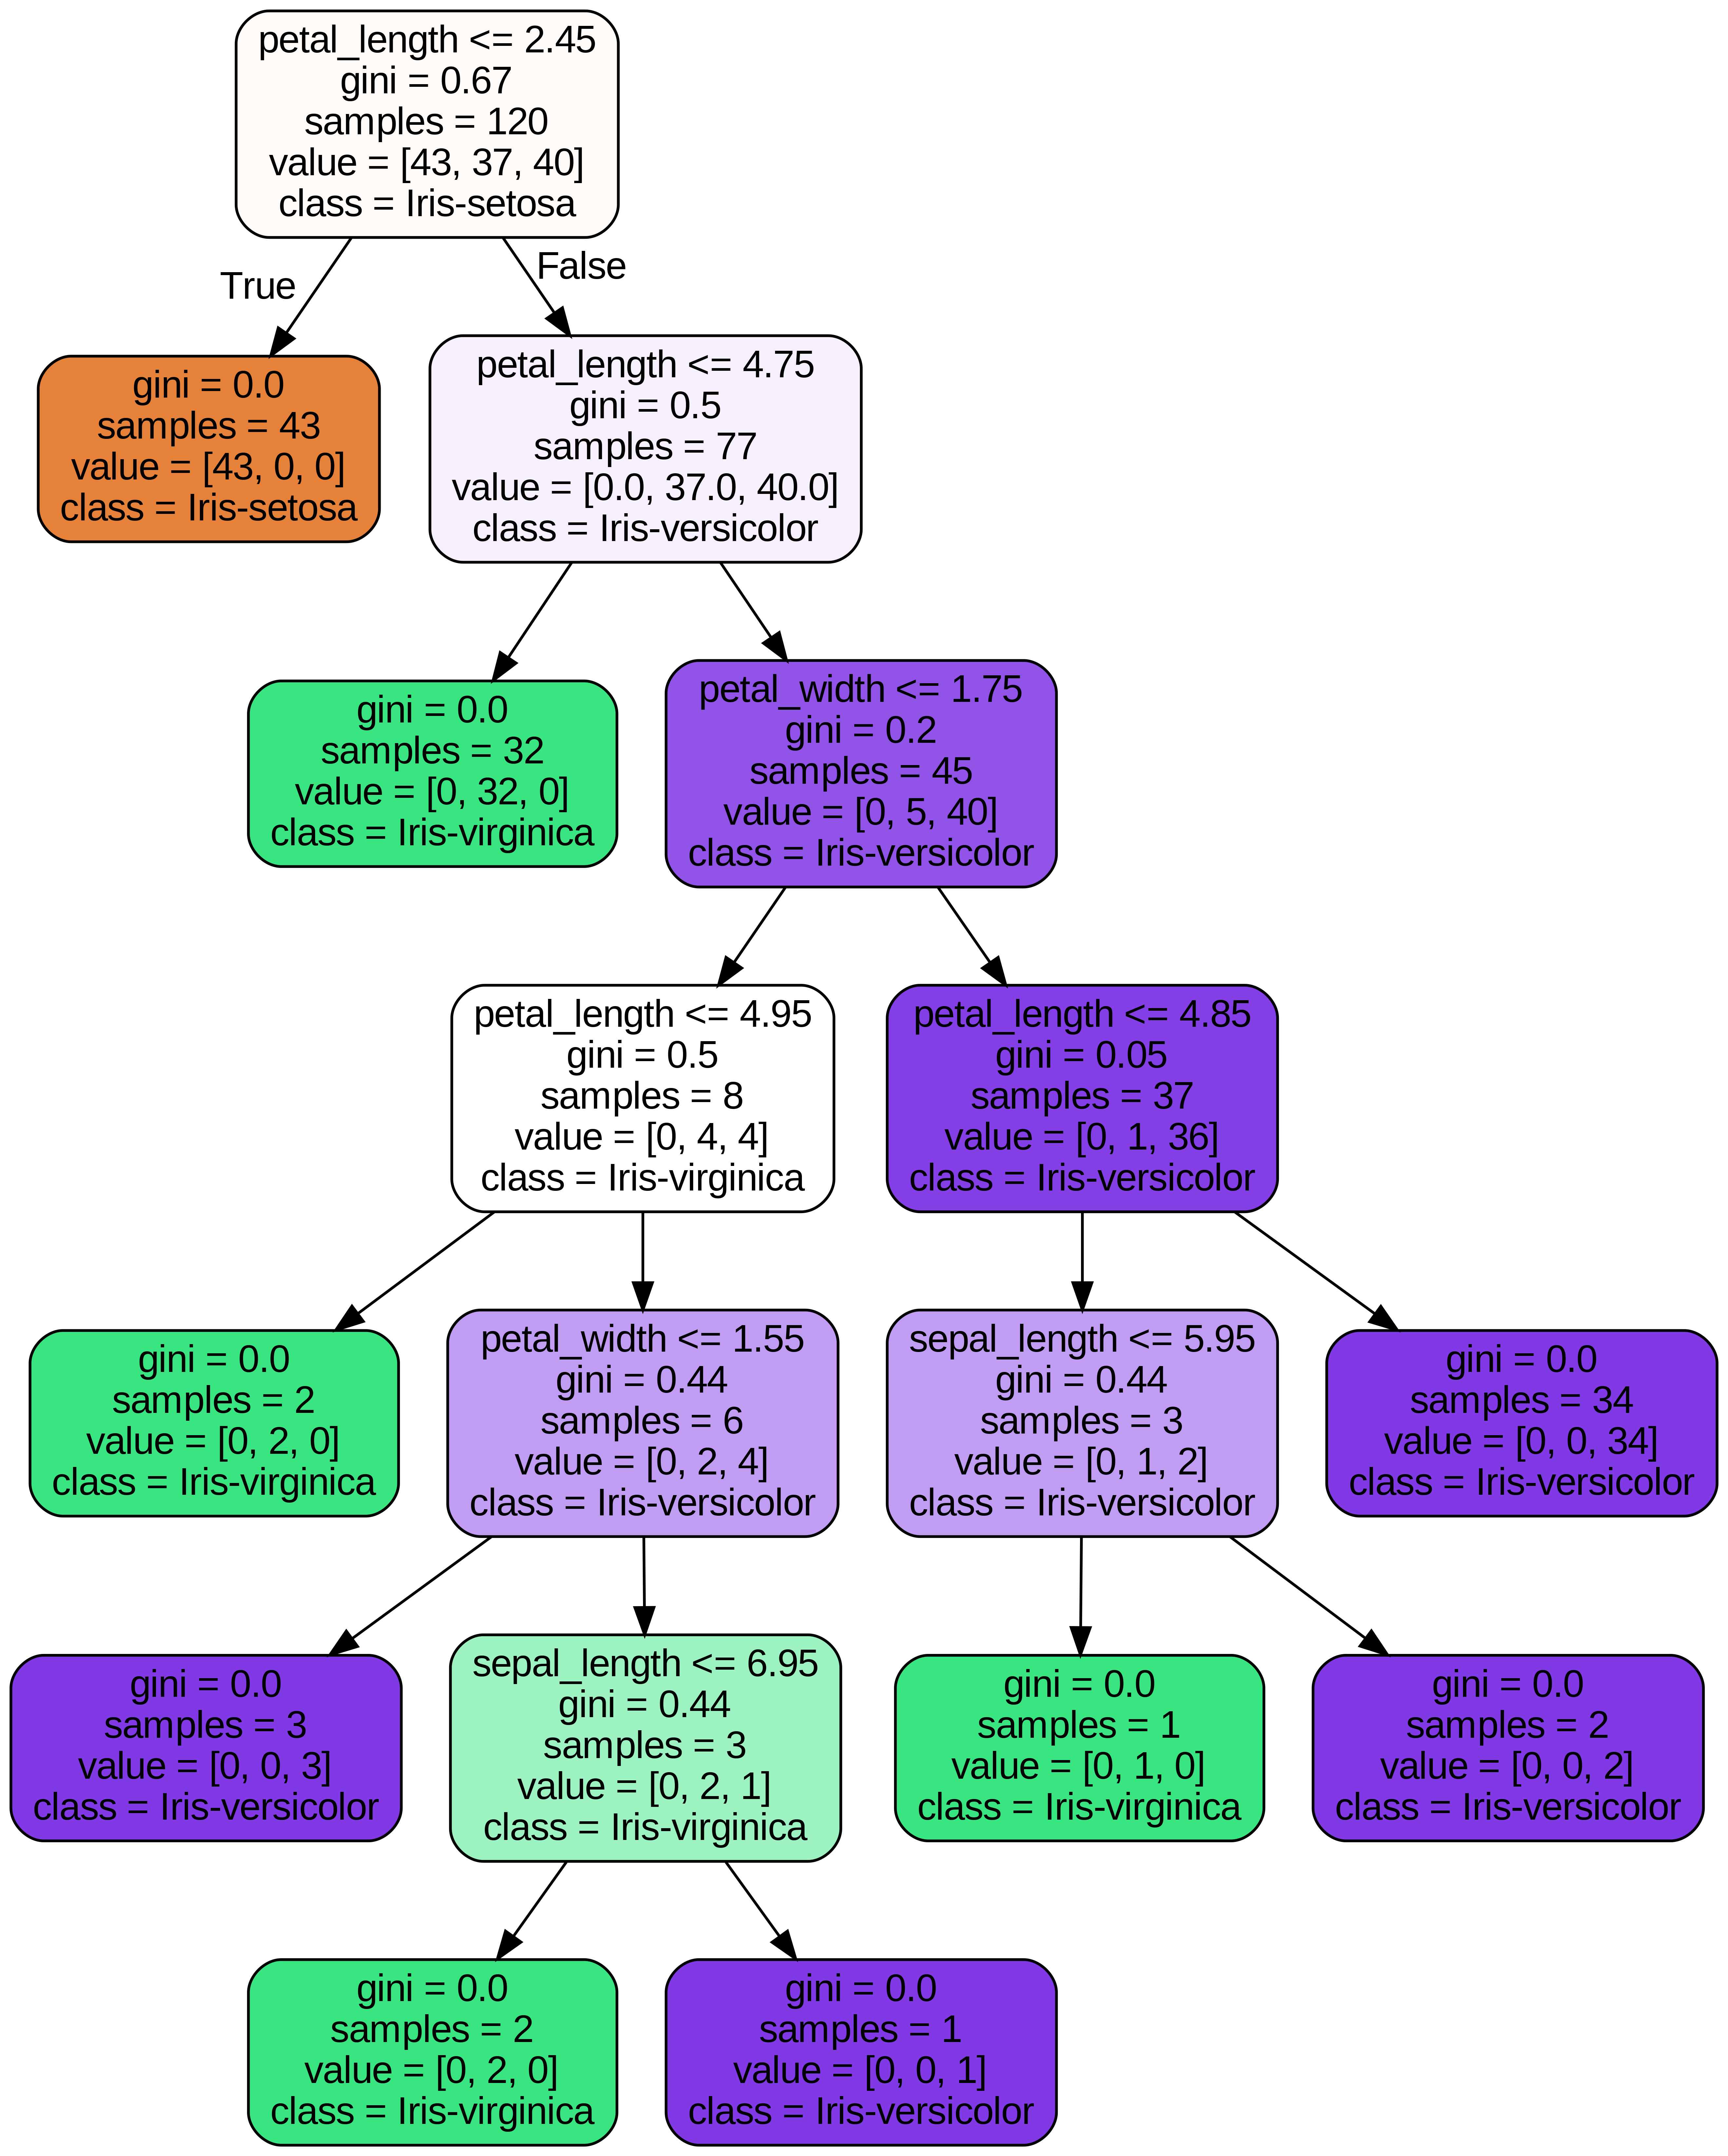

In [39]:
X.columns = ['sepal_length','sepal_width','petal_length','petal_width']
y = iris['species']
y_labels = ['Iris-setosa','Iris-virginica','Iris-versicolor']

from sklearn.tree import export_graphviz

export_graphviz(classifier, out_file='tree.dot',
                feature_names=X.columns,
                class_names=y_labels,
                rounded = True, proportion = False,
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png','-Gdpi=600'])

from IPython.display import Image
Image(filename = 'tree.png')